In [1]:
# Here are some necessary packages that we need to import to run this notebook
import numpy as np
import matplotlib.pyplot as plt

# Curve fitting data to understand underlying trends

In this notebook, we'll learn how to *curve fit* a function to a histogram of a dataset. Finding a function that closely resembles a given histogram will provide information on the underlying model that governs the data.

Let's continue to analyze the Uranium-241 sample you were given. 

You know that radioactive decay processes can be modeled by Poisson processes. 

$$f(n) = N\frac{\lambda^n e^{-\lambda}}{n!}$$
 

 N is the number of trials in the experiment.



**Activity:** Define a poisson function ```poisson_func``` that calculates this value given n and $\lambda$. You will then define a new function ```poisson``` to return an array of values; it will call the function ```poisson_func.```  We will use an n chosen from 0 to 30 as our input to this function. 

Text(0, 0.5, 'Num counts')

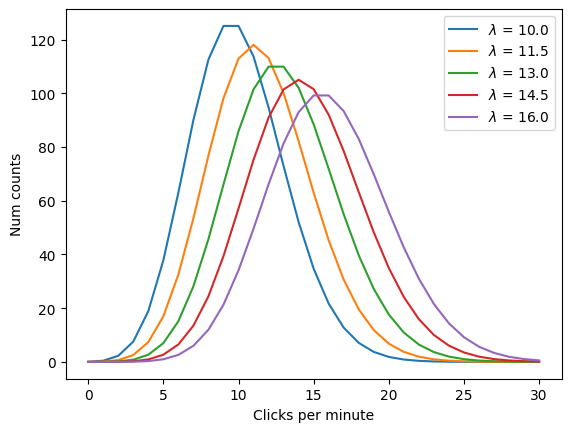

In [7]:
'''   poisson_func calculates the poisson distribution.
      params:  
        n (a count value): float   (you will need to convert it to an integer)
        lam (the parameter lambda): float  (warning: lambda is a reserved word in python so we avoid using it here)
      returns: 
        the value of f, the poisson function: float '''
def poisson_func(n,lam):
  #convert n to an integer before attempting to calculate a factorial or raise lambda to a power.
  # YOUR CODE HERE
  n=int(n)
  return (lam**n)*np.exp(- lam)/np.math.factorial(n)


# Create a sequence of numbers from 0 to 30. There should be 31 numbers in total. Use linspace in the numpy library!
n_vals =  np.linspace(0,30,31)

'''  construct a list of f(n) values based on the values in n.  
      params:  
        n, a count value: an np.array of floats
        lam, the parameter lambda: float  
        N, the total number of trials: int
      returns: 
        a list of the values of f, the poisson function: float '''
def poisson(n,lam,N): #use poisson_func and multiply it by N since we assume N trials. Put the results in a list.
  lst=[]
  for num in n:
    lst.append(N*poisson_func(num, lam))
  return lst


#nothing to change below this line
plt.figure()
lambda_range = np.linspace(10,16,5)
for lam in lambda_range:
  plt.plot(n_vals, poisson(n_vals, lam,1000), label = "$\lambda$ = "+str(lam))
plt.legend()
plt.xlabel("Clicks per minute")
plt.ylabel("Num counts")

## Curve fitting data determines model parameters



When we fit a function to a distribution of data, we need to first choose an analytic model that we think could represent the underlying data. The curve fitting procedure then determines the exact values for the parameters of the model that best align with the data. 

 In the example of Uranium-241, we know that the counts per minute represents a decay process and can therefore be described by a Poisson distribution with a decay rate $\lambda$. So there is one free parameter $\lambda$ that curve fitting will help determine. 


These are the steps we want to execute:

1. Create a histogram for given dataset with a bin choice $b_i$. The histogram produces a list of counts in each bin, $n_i$.

2. Define a function $f(b_i,  \lambda)$ to fit to the histogram. This function will be calculated at the center of each bin to produce a list of the same length of $n_i$.

3. Select a trial value for the fit parameter(s) $\lambda_{\textrm{trial}}$. Calculate the numbers $f(b_i,  \lambda_{\textrm{trial}})$ at each bin center.

4. Calculate the Mean Squared Error (MSE) between the fit function and the data, i.e. between $f(b_i,  \lambda_{\textrm{trial}})$ and $n_i$.  

4. Repeat steps 3 and 4 for a range of $ \lambda_{\textrm{trial}}$ values. 

5. Select the $\lambda_{\textrm{trial}}$ that minimizes the error. This will produce the best-fitting function to the data.

### Mean-Squared Error



$$\mathcal{MSE}(\lambda) = \frac{\sum_i (n_i - f(b_i, \lambda))^2}{\textrm{num. bins}}.$$

Remember that $n_i$ is the list of counts in each histogram bin, so it represents the data. $f(b_i,  \lambda)$ is the model fit function at a given bin $b_i$. So if the fit function isn't a close match to the data, then we expect the error to be very large.


**Activity**: Write a function to calculate the MSE given a set of histogrammed counts (n) called ```obs_vals``` and a set of fit values (f) called ```fit_vals```.

In [94]:
def mean_sq_error(obs_vals, fit_vals):
   #YOUR CODE HERE

**Activity:**  The following code is done for you, except for reading in the file. In this step, we read in the dataset ```geiger_counts_A.txt``` from the usual place. The histogram data is fit to a Poisson curve and the MSE is calculated.

In [ ]:
# First histogram the data

dataset_location = "datasets/geiger_counts_A.txt"

def read_in_dataset(file_loc):
  #YOUR CODE HERE
  return num_clicks_per_minute    #an np.array


#nothing to change below this line
num_clicks_per_minute = read_in_dataset(dataset_location)
N = len(num_clicks_per_minute)
clicks_per_minute_bin_edges = np.linspace(-.5,30.5,32)
clicks_per_minute_bin_centers = 0.5*(clicks_per_minute_bin_edges[1:]+clicks_per_minute_bin_edges[:-1])

# We're using np.histogram() here as we don't necessarily need to see the plot of the histogram
n_i, bins = np.histogram(num_clicks_per_minute, bins = clicks_per_minute_bin_edges, density = False)
# Determine what values of the Poisson parameter $\lambda$ to trial
trial_lam_vals = np.linspace(10,20,40)
trial_losses = []

# For every trial value $\lambda$, calculate the loss between the observed data and the corresponding trial Poisson fit function
for trial_lam in trial_lam_vals:
  fit_vals = list(poisson(clicks_per_minute_bin_centers, trial_lam,N))
  trial_loss = mean_sq_error(n_i, fit_vals)
  trial_losses.append(trial_loss)
  
#  Plot the losses as a function of the trial $\lambda$'s
plt.figure()
plt.plot(trial_lam_vals, trial_losses)
plt.xlabel("Trial $\lambda$")
plt.ylabel("Loss")

# Determine the $\lambda$ that minimizes the loss 
min_lambda = trial_lam_vals[np.where(trial_losses == np.min(trial_losses))][0]
print("Value of $\lambda$ that minimizes the loss:", min_lambda)
 

In [ ]:
plt.figure()
plt.bar(clicks_per_minute_bin_centers, n_i, label = "Observed data")
plt.plot(clicks_per_minute_bin_centers, poisson(clicks_per_minute_bin_centers, min_lambda,N), label = "Best fit")
plt.legend()
plt.xlabel("Clicks per minute")
plt.ylabel("Num counts");


### Using built-in functions to curve fit




We saw in the line-fitting activity that a useful package for curve-fitting is ```scipy.optimize.curve_fit()```.

The function takes three main arguments: 

1. ```f```: the analytic function that you want to curve fit to. The function itself must be of the form ```f(data, params)``` (i.e. the first argument must be the observable)
2. ```xdata```: a ```np.array``` (or ```list```) containing the $x$-axis values that you want to include in the fit. This should be equal to the bin centers of your histogrammed data.
3. ```ydata```: a ```np.array``` (or ```list```) of the historam counts $n_i$

You can read more about ```scipy.optimize.curve_fit()``` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).



**Activity:** Use ```scipy.optimize.curve_fit()``` to fit a Poisson distribution to the dataset. (You just need to fill in the blank in line 4).

 You can use the same variables for the ```xdata``` and ```ydata``` that you see used in the ```plt.bar()``` function in the code cell above. For the function ```f```, use ```poisson_fit```, defined below.



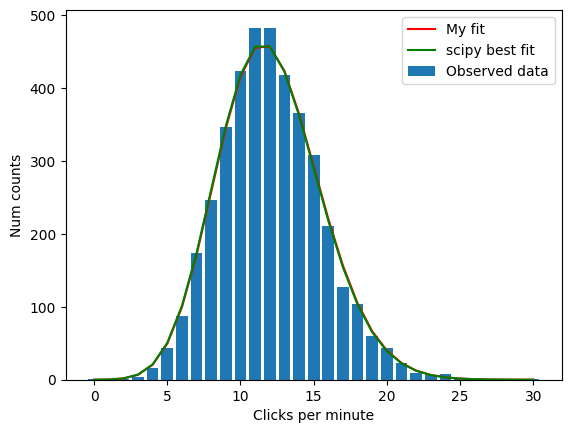

In [97]:
import scipy
from scipy.optimize import curve_fit
def poisson_fit(n, lam): return poisson(n, lam, N)  #adjusts poisson function to use a single parameter (lambda)
params, params_covariance = scipy.optimize.curve_fit(#YOUR CODE HERE)

plt.figure()
plt.bar(clicks_per_minute_bin_centers, n_i, label = "Observed data")
plt.plot(clicks_per_minute_bin_centers, poisson(clicks_per_minute_bin_centers, min_lambda,N), 'r',label = "My fit")
plt.plot(clicks_per_minute_bin_centers, poisson(clicks_per_minute_bin_centers, *params,N), 'g', label = "scipy best fit")
plt.legend()
plt.xlabel("Clicks per minute")
plt.ylabel("Num counts");


You should find that your best fit overlaps with scipy's best fit!


## Stating fit model parameters with confidence interval

Now that we have found a value of $\lambda$ that minimizes the loss of our fit function, we are in a position to state our results. However, the results will be of limited use if we don't provide some sort of error on our estimate. 

Let's say that you ask a friend to independently measure the decay rate of your Uranium-241 sample so that you can compare estimates. The friend tells you that they've measured a decay rate of 12.6 counts / minute. This seems plausible, but it likely isn't exactly the decay rate that you measured. So there seems to be a conflict between the two measurements...

But wait! Your friend then tells you that the uncertainty on their measurement was 0.4 counts / minute. Does this fix the discrepancy?



### Where do uncertainties on a measurement come from?

In any physical experiment, there are many reasons why your measurement of a given quantity might not match the true quantity. 

There will certainly be **statistical errors**, which come from random fluctuations in nature. Just because we know that the decays per minute of a Uranium-241 sample are modeled by a Poisson distribution doesn't mean that we expect our measurements of the decays per minute to be *perfectly* Poissonian, just roughly so. Another random source of statistical errors can be the experimental setup: maybe when you set up the Uranium-241 sample every day, you use a ruler to put the sample exactly 10 cm from the Geiger counter. But perhaps on Monday, you actually put the sample 10.01 cm away, and on Tuesday you put the sample 9.95 cm away, and so on.

There might also be **systematic errors**, which come from the experimental setup. Maybe your Geiger counter is old and always beeps an extra two times a minute. Or perhaps your ruler isn't calibrated correctly, and what you read as 10 cm is in reality 10.1 cm.

As a result, when we make a measurement $Y$ for a given experiment, the distribution of all measurements $Y$ you could make, when accounting for all of the statistical and systematic errors of an experiment, follows a normal distribution.

<p><a href="https://sisu.ut.ee/measurement/31-normal-distribution">
<img src="https://drive.google.com/uc?export=view&id=1x5sxTgujQTaCPP4WlELtRJ8jiNxyGnNo" alt="drawing" width="400"/>
</a></p>

*Note*: that this distribution is not necessarily centered on the true value of the measurement $Y^*$! Imagine a scenario where your systematic errors all cause you to underestimate the measurement of $Y$. Systematic errors affect the *standard deviation* of the distribution. In contrast, statistical errors affect the *mean* of the distribution*.




### Converting measurement uncertainty to a stated measurement



The standard way to quote measurement uncertainty is to give the actual measured value $\pm$ 1 standard deviation of the uncertainty from all sources. So if a measurement is cited as 12.6 $\pm$ 0.4 counts / minute, this means that, given the observed evidence, this interval (lambda is 12.2 and 13 counts per minute) will include the true value 68.3% of the time.

---

Where would these uncertainties come from? As a few examples: the uncertainty for experimental apparatuses would likely be given in the equiptment manuals. The uncertainty due to random fluctuations given bin in a histogram of counts is equal to the square root of the number of counts in that bin.

If you wanted to quote the measurement uncertainty using a model fitting tool like ```scipy.optimize.curve_fit()```, there is an easy way to do so. The function returns both ```params``` (the best fit parameter values) and ```params_covariance```, which is a matrix quantifying the measurement uncertainties on these values. The square root of the diagonal entry in row $i$ corresponds to the fit uncertainty on parameter $i$.

**Activity**: Printout params and params_covariance to make sure they look plausible. For params_covariance, the answer should look something like this:   [[0.0235]].  To remove the brackets, you can either reshape the answer to flatten it and then index it, or you can keep it as a 2-D array but slice it. 

State your best fit value of the decay rate $\lambda$, giving one-standard deviation uncertainty limits. 
In the end, your output should be beautifully formatted and rounded, just like your friend's: 

12.6 $\pm$ 0.4 counts / minute



In [ ]:
#YOUR CODE HERE

Is your value for $\lambda$ consistent with your friend's? 

A very loose way to think about this is to consider whether your range and your friend's overlap.

Usually, in statistics, to compare two means we calculate 95% confidence intervals. The procedure for this, for Poisson data, [goes beyond the scope of this course ](https://userweb.ucs.louisiana.edu/~kxk4695/JSPI-04.pdf). Since this comparison is hypothetical anyway, I suggest giving a loose answer based on whether the intervals overlap with each other.

 
## *Your answer here*: